In [1]:
import pandas as pd
import country_converter as coco
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans
import plotly.colors as pc

# pip install country_converter --upgrade
country_numeric  = [4, 8, 10, 12, 16, 20, 24, 28, 31, 32, 36, 40, 44, 48, 50, 51, 52, 56, 60, 64, 68, 70, 72, 74, 76, 84, 86, 90, 92, 96, 100, 104, 108, 112, 116, 120, 124, 132, 136, 140, 144, 148, 152, 156, 158, 162, 166, 170, 174, 175, 178, 180, 184, 188, 191, 192, 196, 203, 204, 208, 212, 214, 218, 222, 226, 231, 232, 233, 234, 238, 239, 242, 246, 248, 250, 254, 258, 260, 262, 266, 268, 270, 275, 276, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328, 332, 334, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 398, 400, 404, 408, 410, 414, 417, 418, 422, 426, 428, 430, 434, 438, 440, 442, 446, 450, 454, 458, 462, 466, 470, 474, 478, 480, 484, 492, 496, 498, 499, 500, 504, 508, 512, 516, 520, 524, 528, 531, 533, 534, 535, 540, 548, 554, 558, 562, 566, 570, 574, 578, 580, 581, 583, 584, 585, 586, 591, 598, 600, 604, 608, 612, 616, 620, 624, 626, 630, 634, 638, 642, 643, 646, 652, 654, 659, 660, 662, 663, 666, 670, 674, 678, 682, 686, 688, 690, 694, 702, 703, 704, 705, 706, 710, 716, 724, 728, 729, 732, 740, 744, 748, 752, 756, 760, 762, 764, 768, 772, 776, 780, 784, 788, 792, 795, 796, 798, 800, 804, 807, 818, 826, 831, 832, 833, 834, 840, 850, 854, 858, 860, 862, 876, 882, 887, 894]
country_iso3 = ['AFG', 'ALB', 'ATA', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'AZE', 'ARG', 'AUS', 'AUT', 'BHS', 'BHR', 'BGD', 'ARM', 'BRB', 'BEL', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BVT', 'BRA', 'BLZ', 'IOT', 'SLB', 'VGB', 'BRN', 'BGR', 'MMR', 'BDI', 'BLR', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'LKA', 'TCD', 'CHL', 'CHN', 'TWN', 'CXR', 'CCK', 'COL', 'COM', 'MYT', 'COG', 'COD', 'COK', 'CRI', 'HRV', 'CUB', 'CYP', 'CZE', 'BEN', 'DNK', 'DMA', 'DOM', 'ECU', 'SLV', 'GNQ', 'ETH', 'ERI', 'EST', 'FRO', 'FLK', 'SGS', 'FJI', 'FIN', 'ALA', 'FRA', 'GUF', 'PYF', 'ATF', 'DJI', 'GAB', 'GEO', 'GMB', 'PSE', 'DEU', 'GHA', 'GIB', 'KIR', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GIN', 'GUY', 'HTI', 'HMD', 'VAT', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'CIV', 'JAM', 'JPN', 'KAZ', 'JOR', 'KEN', 'PRK', 'KOR', 'KWT', 'KGZ', 'LAO', 'LBN', 'LSO', 'LVA', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MTQ', 'MRT', 'MUS', 'MEX', 'MCO', 'MNG', 'MDA', 'MNE', 'MSR', 'MAR', 'MOZ', 'OMN', 'NAM', 'NRU', 'NPL', 'NLD', 'CUW', 'ABW', 'SXM', 'BES', 'NCL', 'VUT', 'NZL', 'NIC', 'NER', 'NGA', 'NIU', 'NFK', 'NOR', 'MNP', 'UMI', 'FSM', 'MHL', 'PLW', 'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'PCN', 'POL', 'PRT', 'GNB', 'TLS', 'PRI', 'QAT', 'REU', 'ROU', 'RUS', 'RWA', 'BLM', 'SHN', 'KNA', 'AIA', 'LCA', 'MAF', 'SPM', 'VCT', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SVK', 'VNM', 'SVN', 'SOM', 'ZAF', 'ZWE', 'ESP', 'SSD', 'SDN', 'ESH', 'SUR', 'SJM', 'SWZ', 'SWE', 'CHE', 'SYR', 'TJK', 'THA', 'TGO', 'TKL', 'TON', 'TTO', 'ARE', 'TUN', 'TUR', 'TKM', 'TCA', 'TUV', 'UGA', 'UKR', 'MKD', 'EGY', 'GBR', 'GGY', 'JEY', 'IMN', 'TZA', 'USA', 'VIR', 'BFA', 'URY', 'UZB', 'VEN', 'WLF', 'WSM', 'YEM', 'ZMB']
country_names_url = "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/CountryNames.csv"

In [2]:
# Maternal Mortality Ratio from 2000 to 2020
url_mmr = "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/MMR_2000_2020.csv"
# Birth Rate from 2000 to 2020
url_br = "https://raw.githubusercontent.com/MariaStefaniak/SurvivalAtBirth_Global/refs/heads/main/Data_Organization/CSV_Uploads/Rockford/Fertility_2000_2020.csv"

In [3]:
df_mmr = pd.read_csv(url_mmr)
df_br = pd.read_csv(url_br)

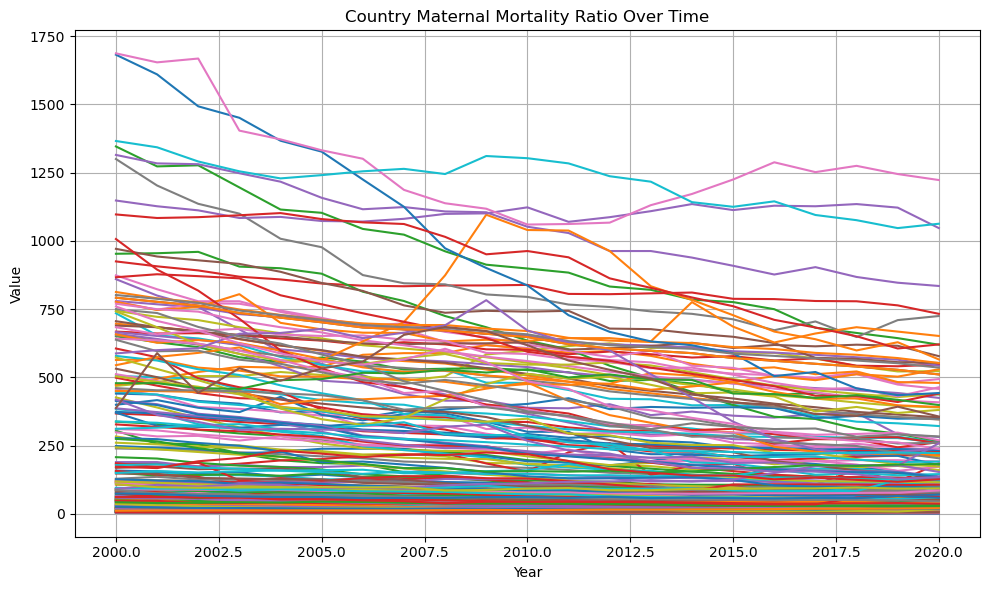

In [4]:
df_mmr = pd.melt(df_mmr, id_vars=['Country Code'], var_name='Year', value_name='Value', )
df_mmr['Year'] = pd.to_numeric(df_mmr['Year'])
plt.figure(figsize=(10, 6))
for country in df_mmr['Country Code'].unique():
    country_data = df_mmr[df_mmr['Country Code'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Country Maternal Mortality Ratio Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

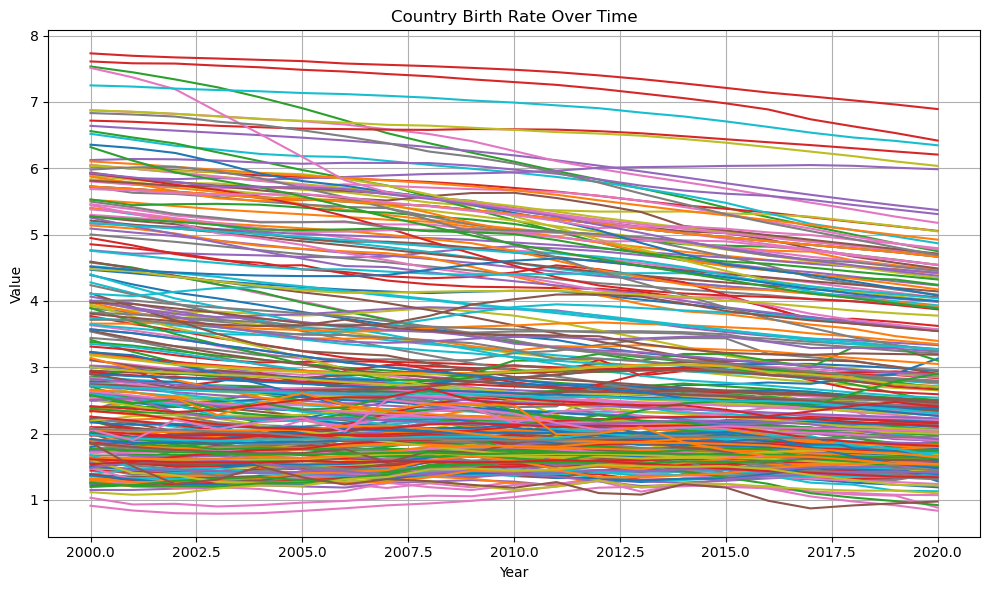

In [5]:
df_br = pd.melt(df_br, id_vars=['Country Code'], var_name='Year', value_name='Value', )
df_br['Year'] = pd.to_numeric(df_br['Year'])
plt.figure(figsize=(10, 6))
for country in df_br['Country Code'].unique():
    country_data = df_br[df_br['Country Code'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Country Birth Rate Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Merge the two dataframes on Country Code and Year
df_merged = pd.merge(df_br, df_mmr, on=['Country Code', 'Year'], suffixes=('_br', '_mmr'))

# Convert Year to numeric
df_merged['Year'] = pd.to_numeric(df_merged['Year'])
df_merged['Value_br'] = pd.to_numeric(df_merged['Value_br'])
df_merged['Value_mmr'] = pd.to_numeric(df_merged['Value_mmr'])

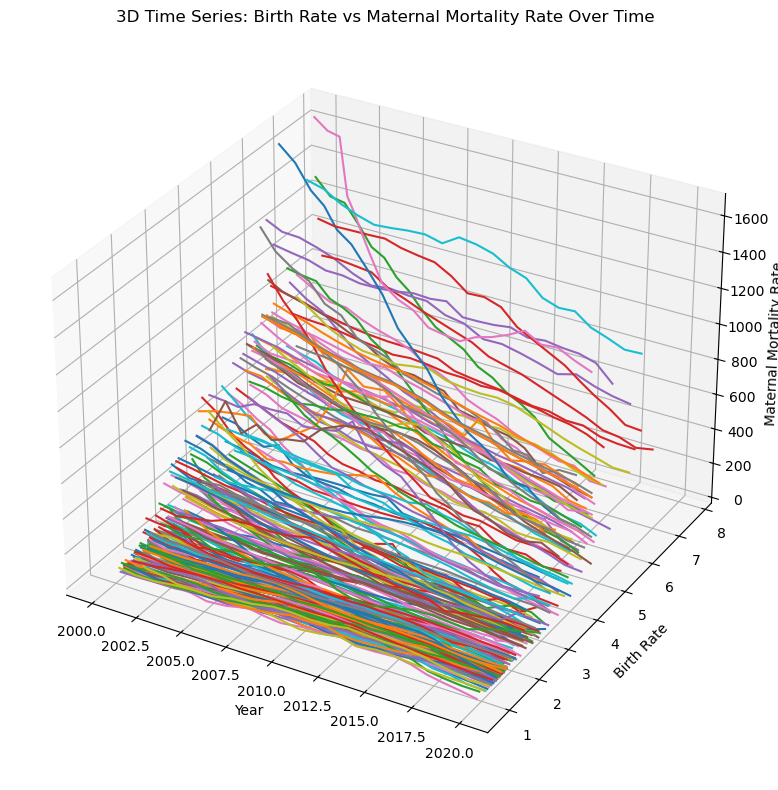

In [7]:
# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each country as a separate line in 3D
for country in df_merged['Country Code'].unique():
    data = df_merged[df_merged['Country Code'] == country]
    ax.plot(data['Year'], data['Value_br'], data['Value_mmr'], label=country)

# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Birth Rate')
ax.set_zlabel('Maternal Mortality Rate')
ax.set_title('3D Time Series: Birth Rate vs Maternal Mortality Rate Over Time')
# ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Country')

plt.tight_layout()
plt.show()

In [8]:
# Create 3D traces for each country
traces = []

for country in df_merged['Country Code'].unique():
    country_data = df_merged[df_merged['Country Code'] == country]
    trace = go.Scatter3d(
        x=country_data['Year'],
        y=country_data['Value_br'],   # Birth Rate
        z=country_data['Value_mmr'],  # Maternal Mortality Rate
        mode='lines+markers',
        name=country
    )
    traces.append(trace)

# Set up the layout
layout = go.Layout(
    title='3D Time Series: Birth Rate vs Maternal Mortality Rate',
    scene=dict(
        xaxis_title='Year',
        yaxis_title='Birth Rate',
        zaxis_title='Maternal Mortality Rate'
    )
)

# Create the figure and show it
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [9]:
# Create animated 2D scatter plot
fig = px.scatter(
    df_merged,
    x='Value_br',
    y='Value_mmr',
    animation_frame='Year',
    color='Country Code',
    hover_name='Country Code',
    labels={
        'Value_br': 'Birth Rate',
        'Value_mmr': 'Maternal Mortality Rate',
    },
    title='Birth Rate vs Maternal Mortality Rate Over Time (2000–2020)',
    size_max=30
)

fig.update_layout(
    xaxis_title='Birth Rate',
    yaxis_title='Maternal Mortality Rate',
    legend_title='Country',
    transition=dict(duration=500),
)

fig.show()


In [10]:
def time_series_cluster(df, value_column='Value_br', n_clusters=3):
    """
    Clusters time series data by country and visualizes with Plotly.

    Parameters:
        df (pd.DataFrame): Long-format DataFrame with 'Country Code', 'Year', and value columns.
        value_column (str): Which value to use for clustering ('Value_br' or 'Value_mmr').
        n_clusters (int): Number of clusters to create.

    Returns:
        pd.DataFrame: Pivoted data with cluster labels.
        Plotly figure: Interactive line plot colored by cluster.
    """
    # Pivot so we have a time series per country
    df_pivot = df.pivot(index='Country Code', columns='Year', values=value_column)

    # Drop countries with missing values across years
    df_clean = df_pivot.dropna()

    # Run KMeans on the time series
    model = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    clusters = model.fit_predict(df_clean)

    # Add cluster labels
    df_clean['Cluster'] = clusters

    # Melt for plotting
    df_clean.reset_index(inplace=True)
    df_long = pd.melt(df_clean, id_vars=['Country Code', 'Cluster'], var_name='Year', value_name='Value')
    df_long['Year'] = pd.to_numeric(df_long['Year'])

    # Plot with Plotly
    fig = px.line(
        df_long,
        x='Year',
        y='Value',
        color='Cluster',
        line_group='Country Code',
        hover_name='Country Code',
        title=f'Time Series Clustering on {value_column} ({n_clusters} Clusters)'
    )

    fig.update_layout(
        xaxis_title='Year',
        yaxis_title=value_column.replace('_', ' '),
        legend_title='Cluster'
    )

    fig.show()

    return df_clean, fig


In [11]:
# Cluster countries based on birth rate time series
clustered_df, fig = time_series_cluster(df_merged, value_column='Value_br', n_clusters=4)

# Or cluster based on maternal mortality rate
clustered_df, fig = time_series_cluster(df_merged, value_column='Value_mmr', n_clusters=4)


/var/folders/m3/vm221r5s71g7qmxrb1585p_40000gn/T/ipykernel_99473/3418829972.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/m3/vm221r5s71g7qmxrb1585p_40000gn/T/ipykernel_99473/3418829972.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
def plot_3d_time_series_clusters(df, n_clusters=3):
    """
    Cluster countries using both birth rate and maternal mortality time series,
    and plot 3D lines colored by cluster.

    Parameters:
        df (pd.DataFrame): Must include 'Country Code', 'Year', 'Value_br', 'Value_mmr'
        n_clusters (int): Number of clusters

    Returns:
        pd.DataFrame: Clustered data
        go.Figure: Plotly 3D figure
    """
    # Pivot each metric
    br_pivot = df.pivot(index='Country Code', columns='Year', values='Value_br')
    mmr_pivot = df.pivot(index='Country Code', columns='Year', values='Value_mmr')

    # Combine features
    combined = pd.concat([br_pivot, mmr_pivot], axis=1, keys=['BR', 'MMR'])
    combined.columns = [f"{metric}_{year}" for metric, year in combined.columns]
    combined = combined.dropna()

    # Run KMeans
    model = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    combined['Cluster'] = model.fit_predict(combined)

    # Merge cluster labels back
    clustered_df = combined.reset_index()[['Country Code', 'Cluster']]
    df_plot = df.merge(clustered_df, on='Country Code')
    df_plot['Year'] = pd.to_numeric(df_plot['Year'])
    df_plot['Cluster'] = df_plot['Cluster'].astype(int)

    # Assign cluster colors
    colors = pc.qualitative.Set1  # or use Set3, Pastel, etc.
    cluster_color_map = {cluster: colors[i % len(colors)] for i, cluster in enumerate(sorted(df_plot['Cluster'].unique()))}

    # Plot
    traces = []
    for country in df_plot['Country Code'].unique():
        country_data = df_plot[df_plot['Country Code'] == country]
        cluster = country_data['Cluster'].iloc[0]
        color = cluster_color_map[cluster]

        trace = go.Scatter3d(
            x=country_data['Year'],
            y=country_data['Value_br'],
            z=country_data['Value_mmr'],
            mode='lines+markers',
            name=country,
            legendgroup=f"Cluster {cluster}",
            marker=dict(size=4, color=color),
            line=dict(width=3, color=color),
            showlegend=False
        )
        traces.append(trace)

    # Add one dummy trace per cluster for the legend
    for cluster, color in cluster_color_map.items():
        traces.append(go.Scatter3d(
            x=[None], y=[None], z=[None],
            mode='markers',
            marker=dict(size=6, color=color),
            name=f'Cluster {cluster}',
            showlegend=True,
            legendgroup=f"Cluster {cluster}"
        ))

    layout = go.Layout(
        title='3D Time Series: Birth Rate vs Maternal Mortality Rate (Clustered)',
        scene=dict(
            xaxis_title='Year',
            yaxis_title='Birth Rate',
            zaxis_title='Maternal Mortality Rate'
        ),
        legend=dict(title='Cluster')
    )

    fig = go.Figure(data=traces, layout=layout)
    fig.show()

    return df_plot, fig


In [13]:
clustered_df, fig = plot_3d_time_series_clusters(df_merged, n_clusters=4)
